In [32]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from tqdm import tqdm
from matplotlib import pyplot as plt
import time

In [2]:
transition_times = pd.read_excel('Transition_times_reduced.xlsx')

In [3]:
transition_times['Transition'] = clean_transition_column(transition_times['Transition'])

In [4]:
transition_matrix_1 = pd.read_excel('Marquette_A_DePaul_B_Transitions_v1.xlsx',index_col='Starting_State')
transition_matrix_2 = pd.read_excel('Marquette_A_DePaul_B_Transitions_v2.xlsx',index_col='Starting_State')

In [5]:
scoring = pd.read_excel('Transitions_and_scores_v2.xlsx')

In [6]:
scoring['Transition']=clean_transition_column(scoring['Transition'])

In [7]:
def choose_ending_state(state):
    # Get the row corresponding to the starting state
    transition_probs = transition_matrix_1.loc[state]
    
    # Choose an ending state based on the probabilities
    ending_state = np.random.choice(transition_probs.index, p=transition_probs.values)
    
    return ending_state

In [8]:
#game starts with team_a = 0, team_b = 0, time = 20*60

In [9]:
a_score = 0
b_score = 0
time_remaining = 20*60

In [10]:
first_half_events = pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])
time_remaining=20*60
#first crack at real simulation - will be slowed by dataframe transition lookup - would be better to use each unique
#transition as a key with the value being the time distribution, but can switch later
current_state = np.random.choice(['Ai0','Bi0'])
while time_remaining >= 0:
    next_state = choose_ending_state(current_state)
    transition = (current_state, next_state)
    possible_times = transition_times[transition_times['Transition']==transition].copy()
    time_elapsed = np.random.choice(possible_times['Time'])

    time_remaining-=time_elapsed

    play_score = scoring[scoring['Transition']==transition].copy()
    play_score['Time'] = time_remaining
    first_half_events = pd.concat([first_half_events, play_score])
    current_state = next_state

first_half_events['Team_A_Final'] = first_half_events['Team_A'].cumsum()
first_half_events['Team_B_Final'] = first_half_events['Team_B'].cumsum()

print('First Half Result: ')
print(first_half_events.tail(1))

second_half_events=pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])

current_state = np.random.choice(['Ai0','Bi0'])
time_remaining=20*60
while time_remaining >= 0:
    next_state = choose_ending_state(current_state)
    transition = (current_state, next_state)
    possible_times = transition_times[transition_times['Transition']==transition].copy()
    time_elapsed = np.random.choice(possible_times['Time'])

    time_remaining-=time_elapsed

    play_score = scoring[scoring['Transition']==transition].copy()
    play_score['Time'] = time_remaining
    second_half_events = pd.concat([second_half_events, play_score])
    current_state = next_state

first_half_events['Period']=1
second_half_events['Period']=2

final_df = pd.concat([first_half_events,second_half_events])

final_df['Team_A_Final'] = final_df['Team_A'].cumsum()
final_df['Team_B_Final'] = final_df['Team_B'].cumsum()

First Half Result: 
    Transition Team_A Team_B Time Team_A_Final Team_B_Final
11  (Bi2, Ar0)      0      0   -5           54           36


In [49]:
#simulate that game 100 times to see average margin...
margins = []
times1 = []
times2 = []
times3 = []
times4 = []






for i in tqdm(range(10)):
    


    first_half_events = pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])
    time_remaining=20*60
    #first crack at real simulation - will be slowed by dataframe transition lookup - would be better to use each unique
    #transition as a key with the value being the time distribution, but can switch later
    current_state = np.random.choice(['Ai0','Bi0'])
    while time_remaining >= 0:
        tstart = time.time()

        next_state = choose_ending_state(current_state)
        transition = (current_state, next_state)
        #time to choose state - times1
        t1=time.time()
        times1.append(t1-tstart)


        #time to poll random duration - times2
        possible_times = transition_times[transition_times['Transition']==transition].copy()
        time_elapsed = np.random.choice(possible_times['Time'])

        time_remaining-=time_elapsed
        t2=time.time()
        times2.append(t2-t1)

        #time to add score to df - times3
        play_score = scoring[scoring['Transition']==transition].copy()
        play_score['Time'] = time_remaining
        first_half_events = pd.concat([first_half_events, play_score])
        current_state = next_state
        t3 = time.time()
        times3.append(t3-t2)

    first_half_events['Team_A_Final'] = first_half_events['Team_A'].cumsum()
    first_half_events['Team_B_Final'] = first_half_events['Team_B'].cumsum()

    # print('First Half Result: ')
    # print(first_half_events.tail(1))

    second_half_events=pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])

    current_state = np.random.choice(['Ai0','Bi0'])
    time_remaining=20*60
    while time_remaining >= 0:
        tstart = time.time()
        next_state = choose_ending_state(current_state)
        transition = (current_state, next_state)
        #time to choose state - times1
        t1=time.time()
        times1.append(t1-tstart)


        possible_times = transition_times[transition_times['Transition']==transition].copy()
        time_elapsed = np.random.choice(possible_times['Time'])

        time_remaining-=time_elapsed
        t2=time.time()
        times2.append(t2-t1)

        play_score = scoring[scoring['Transition']==transition].copy()
        play_score['Time'] = time_remaining
        second_half_events = pd.concat([second_half_events, play_score])
        current_state = next_state
        t3 = time.time()
        times3.append(t3-t2)

    first_half_events['Period']=1
    second_half_events['Period']=2

    final_df = pd.concat([first_half_events,second_half_events])

    final_df['Team_A_Final'] = final_df['Team_A'].cumsum()
    final_df['Team_B_Final'] = final_df['Team_B'].cumsum()

    #calculate margin
    team_a_score = final_df.iloc[-1]['Team_A_Final']
    team_b_score = final_df.iloc[-1]['Team_B_Final']
    simulated_margin = team_a_score - team_b_score
    margins.append(simulated_margin)




100%|██████████| 10/10 [01:08<00:00,  6.81s/it]


In [50]:
np.mean(times1)

0.00016123721727713785

In [51]:
np.mean(times2)

0.029970876328376767

In [52]:
np.mean(times3)

0.0011130668287929943

(array([0., 2., 0., 0., 0., 1., 0., 1., 2., 1., 3., 0., 0.]),
 array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,
         35.,  40.,  45.]),
 <BarContainer object of 13 artists>)

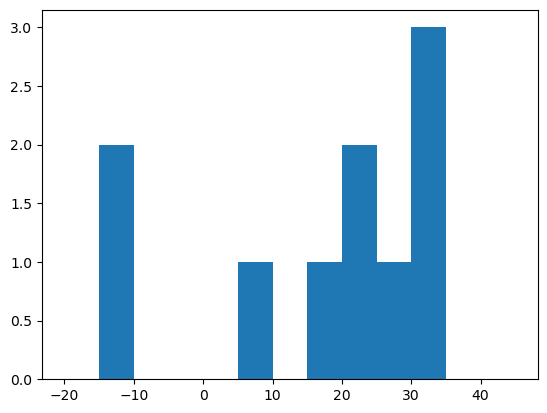

In [53]:
plt.hist(margins, bins=np.linspace(-20,45,14))

In [54]:
def choose_ending_state_2(state):
    # Get the row corresponding to the starting state
    transition_probs = transition_matrix_2.loc[state]
    
    # Choose an ending state based on the probabilities
    ending_state = np.random.choice(transition_probs.index, p=transition_probs.values)
    
    return ending_state

In [61]:
first_half_events = pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])
time_remaining=20*60
#first crack at real simulation - will be slowed by dataframe transition lookup - would be better to use each unique
#transition as a key with the value being the time distribution, but can switch later
current_state = np.random.choice(['Ai0','Bi0'])
while time_remaining >= 0:
    next_state = choose_ending_state_2(current_state)
    transition = (current_state, next_state)
    possible_times = transition_times[transition_times['Transition']==transition].copy()
    time_elapsed = np.random.choice(possible_times['Time'])

    time_remaining-=time_elapsed

    play_score = scoring[scoring['Transition']==transition].copy()
    play_score['Time'] = time_remaining
    first_half_events = pd.concat([first_half_events, play_score])
    current_state = next_state

first_half_events['Team_A_Final'] = first_half_events['Team_A'].cumsum()
first_half_events['Team_B_Final'] = first_half_events['Team_B'].cumsum()

print('First Half Result: ')
print(first_half_events.tail(1))

second_half_events=pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])

current_state = np.random.choice(['Ai0','Bi0'])
time_remaining=20*60
while time_remaining >= 0:
    next_state = choose_ending_state_2(current_state)
    transition = (current_state, next_state)
    possible_times = transition_times[transition_times['Transition']==transition].copy()
    time_elapsed = np.random.choice(possible_times['Time'])

    time_remaining-=time_elapsed

    play_score = scoring[scoring['Transition']==transition].copy()
    play_score['Time'] = time_remaining
    second_half_events = pd.concat([second_half_events, play_score])
    current_state = next_state

first_half_events['Period']=1
second_half_events['Period']=2

final_df = pd.concat([first_half_events,second_half_events])

final_df['Team_A_Final'] = final_df['Team_A'].cumsum()
final_df['Team_B_Final'] = final_df['Team_B'].cumsum()

First Half Result: 
    Transition Team_A Team_B Time Team_A_Final Team_B_Final
17  (Ai2, Bi2)      2      0  -20           35           35


In [62]:
final_df

,Transition,Team_A,Team_B,Time,Team_A_Final,Team_B_Final,Period
29,"(Ai0, Br0)",0,0,1184,0,0,1
22,"(Br0, Bf0)",0,0,1183,0,0,1
23,"(Bf0, Bf1)",0,1,1183,0,1,1
65,"(Bf1, Ar0)",0,0,1181,0,1,1
18,"(Ar0, Bi2)",2,0,1177,2,1,1
...,...,...,...,...,...,...,...
36,"(Ai2, Br0)",0,0,38,84,58,2
4,"(Br0, Ar0)",0,0,29,84,58,2
3,"(Ar0, Br0)",0,0,20,84,58,2
32,"(Br0, Br0)",0,0,3,84,58,2


In [63]:
#simulate that game 100 times to see average margin...
margins_2 = []
for i in tqdm(range(100)):


    first_half_events = pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])
    time_remaining=20*60
    #first crack at real simulation - will be slowed by dataframe transition lookup - would be better to use each unique
    #transition as a key with the value being the time distribution, but can switch later
    current_state = np.random.choice(['Ai0','Bi0'])
    while time_remaining >= 0:
        next_state = choose_ending_state_2(current_state)
        transition = (current_state, next_state)
        possible_times = transition_times[transition_times['Transition']==transition].copy()
        time_elapsed = np.random.choice(possible_times['Time'])

        time_remaining-=time_elapsed

        play_score = scoring[scoring['Transition']==transition].copy()
        play_score['Time'] = time_remaining
        first_half_events = pd.concat([first_half_events, play_score])
        current_state = next_state

    first_half_events['Team_A_Final'] = first_half_events['Team_A'].cumsum()
    first_half_events['Team_B_Final'] = first_half_events['Team_B'].cumsum()

    # print('First Half Result: ')
    # print(first_half_events.tail(1))

    second_half_events=pd.DataFrame(columns=['Transition','Team_A','Team_B','Time'])

    current_state = np.random.choice(['Ai0','Bi0'])
    time_remaining=20*60
    while time_remaining >= 0:
        next_state = choose_ending_state(current_state)
        transition = (current_state, next_state)
        possible_times = transition_times[transition_times['Transition']==transition].copy()
        time_elapsed = np.random.choice(possible_times['Time'])

        time_remaining-=time_elapsed

        play_score = scoring[scoring['Transition']==transition].copy()
        play_score['Time'] = time_remaining
        second_half_events = pd.concat([second_half_events, play_score])
        current_state = next_state

    first_half_events['Period']=1
    second_half_events['Period']=2

    final_df = pd.concat([first_half_events,second_half_events])

    final_df['Team_A_Final'] = final_df['Team_A'].cumsum()
    final_df['Team_B_Final'] = final_df['Team_B'].cumsum()

    #calculate margin
    team_a_score = final_df.iloc[-1]['Team_A_Final']
    team_b_score = final_df.iloc[-1]['Team_B_Final']
    simulated_margin = team_a_score - team_b_score
    margins_2.append(simulated_margin)



100%|██████████| 100/100 [13:36<00:00,  8.17s/it]


(array([ 1.,  1.,  8., 12., 16., 17., 25.,  9.,  7.,  4.]),
 array([-23. , -15.7,  -8.4,  -1.1,   6.2,  13.5,  20.8,  28.1,  35.4,
         42.7,  50. ]),
 <BarContainer object of 10 artists>)

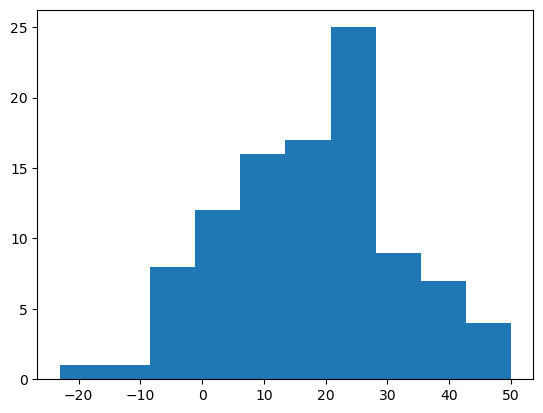

In [64]:
plt.hist(margins_2) #, bins=np.linspace(-20,45,14))